In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,\
      MaxPool2D, Conv2D, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping

2022-04-01 10:55:38.498601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-01 10:55:38.498621: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
IMG_SIZE=28
BATCH_SIZE=200
EPOCHS=30

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train[..., tf.newaxis].astype('float32') # (60000,28,28)->(60000,28,28,1)
x_test = x_test[..., tf.newaxis].astype('float32')

In [5]:
y_train = np_utils.to_categorical(y_train) # (60000,) -> (60000,10)
y_test = np_utils.to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

2022-04-01 10:55:40.465227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-01 10:55:40.465263: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-01 10:55:40.465286: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a): /proc/driver/nvidia/version does not exist
2022-04-01 10:55:40.465555: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [10]:
data_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=15,
                               width_shift_range=0.2,
                               height_shift_range=0.1,
                               zoom_range=0.1)

In [11]:
train_data = data_gen.flow(x_train,
                           y_train,
                           batch_size=BATCH_SIZE)

In [12]:
test_data = data_gen.flow(x_test,
                          y_test,
                          batch_size=BATCH_SIZE)

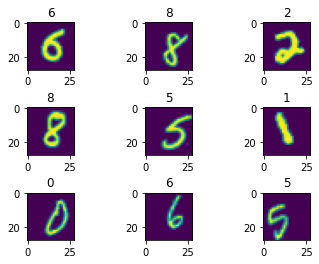

In [13]:
for i in range(9):
    img, lab = train_data.next()
    plt.subplot(3,3,i+1)
    plt.imshow(img[0])
    plt.subplots_adjust(hspace=0.8)
    plt.title(np.argmax(lab[0]))

In [14]:
earlystop = EarlyStopping(monitor='val_loss', # better than val_acc
                          patience=3, 
                          mode='auto', # default
                          verbose=1)

In [15]:
checkpoint = ModelCheckpoint('straight_korea.h5', 
                             monitor='val_loss',
                             save_best_only=True,
                             mode='auto',
                             verbose=1)

In [16]:
history = model.fit(train_data,
                    steps_per_epoch=len(x_train)//BATCH_SIZE, # 300
                    validation_data=test_data,
                    validation_steps=len(x_test)//BATCH_SIZE, # 50
                    epochs=EPOCHS,
                    callbacks=[earlystop, checkpoint])
                    # callbacks=[earlystop])

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.4319 - accuracy: 0.8624
Epoch 1: val_loss improved from inf to 0.10574, saving model to straight_korea.h5
300/300 [==============================] - 35s 113ms/step - loss: 0.4319 - accuracy: 0.8624 - val_loss: 0.1057 - val_accuracy: 0.9662
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.1195 - accuracy: 0.9631
Epoch 2: val_loss improved from 0.10574 to 0.08010, saving model to straight_korea.h5
300/300 [==============================] - 34s 114ms/step - loss: 0.1195 - accuracy: 0.9631 - val_loss: 0.0801 - val_accuracy: 0.9756
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9743
Epoch 3: val_loss improved from 0.08010 to 0.05216, saving model to straight_korea.h5
300/300 [==============================] - 34s 113ms/step - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0522 - val_accuracy: 0.9853
Epoch 4/30
300/300 [==============================] - ET

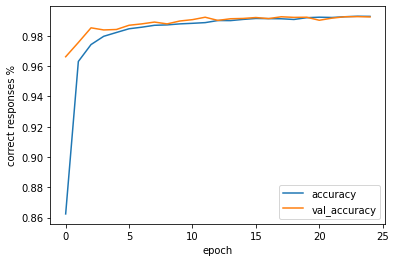

In [17]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

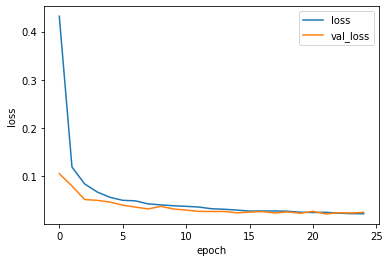

In [18]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()